In [1]:
import cv2

In [2]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Genuine signatures (flattened list)
gen_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*')
    ] for file in dataset
]

# Forged signatures (flattened list)
forg_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')
    ] for file in dataset
]



In [4]:
# Check how many genuine and forged signatures were loaded
print(f"Number of genuine signatures loaded: {len(gen_sign)}")
print(f"Number of forged signatures loaded: {len(forg_sign)}")

# Optionally, print some sample file paths to verify
if gen_sign:
    print(f"Sample genuine signature: {gen_sign[0]}")
if forg_sign:
    print(f"Sample forged signature: {forg_sign[0]}")


Number of genuine signatures loaded: 270
Number of forged signatures loaded: 360
Sample genuine signature: Dataset_Signature_Final/Dataset/dataset1/real\00100001.png
Sample forged signature: Dataset_Signature_Final/Dataset/dataset1/forge\02100001.png


In [5]:
import cv2

def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images


In [6]:
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

Displaying first genuine signature:


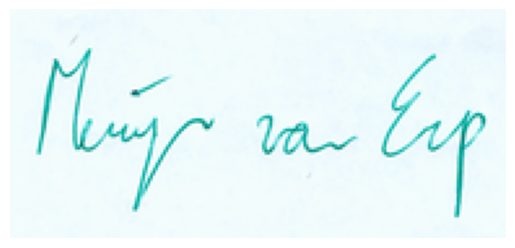

Displaying first forged signature:


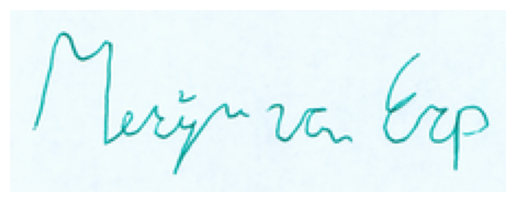

First genuine image shape: (88, 191, 3)
First forged image shape: (83, 226, 3)


In [7]:
import glob
import cv2
import matplotlib.pyplot as plt
import os

# Function to load images and return a list of valid images
def load_images(base_paths):
    images = []
    for path in base_paths:
        # Only match image files by specifying extensions
        for img_path in glob.glob(path):
            # Check if the file is a valid image
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)  # Append the image itself, not just the path
                else:
                    print(f"Could not load image: {img_path}")
    return images

# Load genuine signatures (flattened list of images)
genuine_paths = [
    'Dataset_Signature_Final/Dataset/dataset1/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset2/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset3/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset4/real1/*.*'
]
gen_imgs = load_images(genuine_paths)

# Load forged signatures (flattened list of images)
forged_paths = [
    'Dataset_Signature_Final/Dataset/dataset1/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset2/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset3/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset4/forge/*.*'
]
forg_imgs = load_images(forged_paths)

# Function to display an image
def display_image(image):
    if image is None:
        print("Error: Image is None.")
        return

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Display the first genuine signature image
if gen_imgs:  # Check if the list is not empty
    print("Displaying first genuine signature:")
    display_image(gen_imgs[0])  # Display the first image
else:
    print("No genuine signature images found.")

# Display the first forged signature image
if forg_imgs:  # Check if the list is not empty
    print("Displaying first forged signature:")
    display_image(forg_imgs[0])  # Display the first image
else:
    print("No forged signature images found.")

# Print the first image data
if gen_imgs:
    print(f"First genuine image shape: {gen_imgs[0].shape}")  # Prints shape of the image
else:
    print("No genuine images available.")

if forg_imgs:
    print(f"First forged image shape: {forg_imgs[0].shape}")  # Prints shape of the image
else:
    print("No forged images available.")


In [8]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


In [9]:
gen_imgs[0].shape

(88, 191, 3)

In [10]:
num_gen=sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures :{ num_gen}')
print(f'Number of forged signatures :{ num_forg}')

Number of real signatures :15660
Number of forged signatures :21240


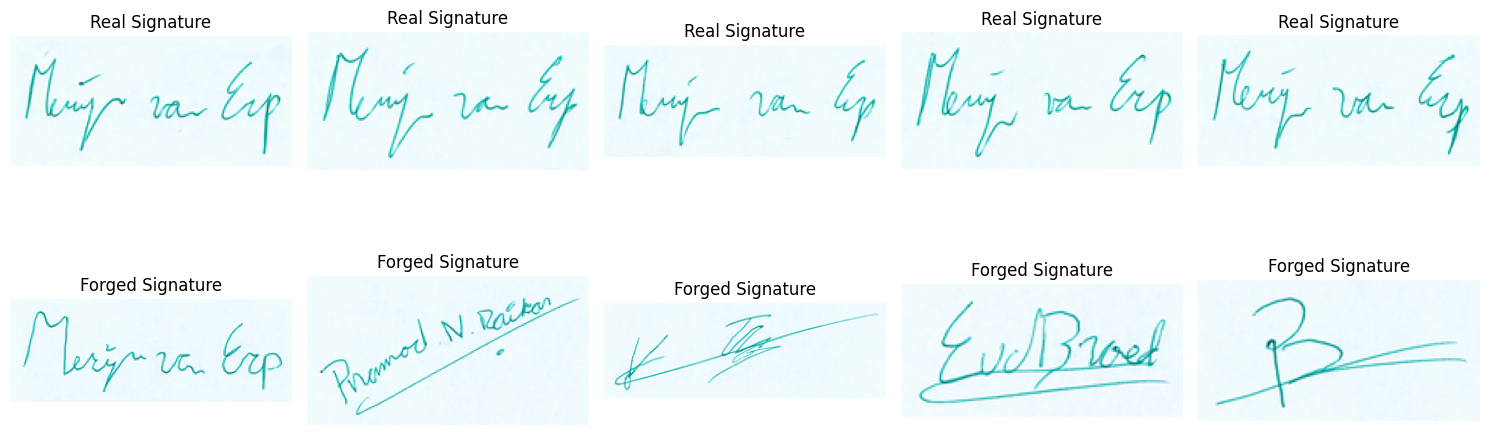

In [11]:
import matplotlib.pyplot as plt
import cv2

# Assuming gen_imgs and forg_imgs are already loaded and contain images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

# Display genuine signatures
for i in range(min(5, len(gen_imgs))):  # Use min to avoid IndexError
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature')
    ax[0, i].axis('off')  # Turn off axes

# Display forged signatures
for i in range(min(5, len(forg_imgs))):  # Use min to avoid IndexError
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature')
    ax[1, i].axis('off')  # Turn off axes

plt.tight_layout()  # Adjust layout
plt.show()


In [12]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])
                                 

In [13]:
# Initialize lists for genuine signatures
gen_shape = []
gen_color = []
gen_pixels = []

# Collect properties for genuine signatures
for img in gen_imgs:
    shape = img.shape
    gen_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    gen_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    gen_pixels.append(mean_pixel_value)

# Initialize lists for forged signatures
forg_shape = []
forg_color = []
forg_pixels = []

# Collect properties for forged signatures
for img in forg_imgs:
    shape = img.shape
    forg_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    forg_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    forg_pixels.append(mean_pixel_value)

# Initialize the DataFrame with the structure
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

# Collect data for real and forged signatures
data_list = []

# Append data for genuine signatures
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

# Append data for forged signatures
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

# Convert the list of dictionaries to a DataFrame
image_data = pd.DataFrame(data_list)

# Output to check
print(image_data)

       Type           Shape  Color Channels  Mean Pixel Value
0      Real    (88, 191, 3)               3        242.764537
1      Real    (90, 184, 3)               3        243.156039
2      Real    (80, 202, 3)               3        243.308932
3      Real    (90, 186, 3)               3        243.039865
4      Real    (90, 194, 3)               3        242.720103
..      ...             ...             ...               ...
625  Forged  (382, 1010, 3)               3        240.179306
626  Forged  (532, 1552, 3)               3        243.524036
627  Forged  (386, 1023, 3)               3        240.151832
628  Forged  (571, 1402, 3)               3        243.676428
629  Forged   (336, 965, 3)               3        238.301999

[630 rows x 4 columns]


In [14]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [15]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel Value
625,Forged,"(382, 1010, 3)",3,240.179306
626,Forged,"(532, 1552, 3)",3,243.524036
627,Forged,"(386, 1023, 3)",3,240.151832
628,Forged,"(571, 1402, 3)",3,243.676428
629,Forged,"(336, 965, 3)",3,238.301999


In [16]:
image_data.shape

(630, 4)

In [17]:
#display summary statistics of image data
print(image_data.describe())

       Color Channels  Mean Pixel Value
count           630.0        630.000000
mean              3.0        243.707944
std               0.0          5.005948
min               3.0        231.164579
25%               3.0        240.433114
50%               3.0        243.039865
75%               3.0        248.727406
max               3.0        252.423212


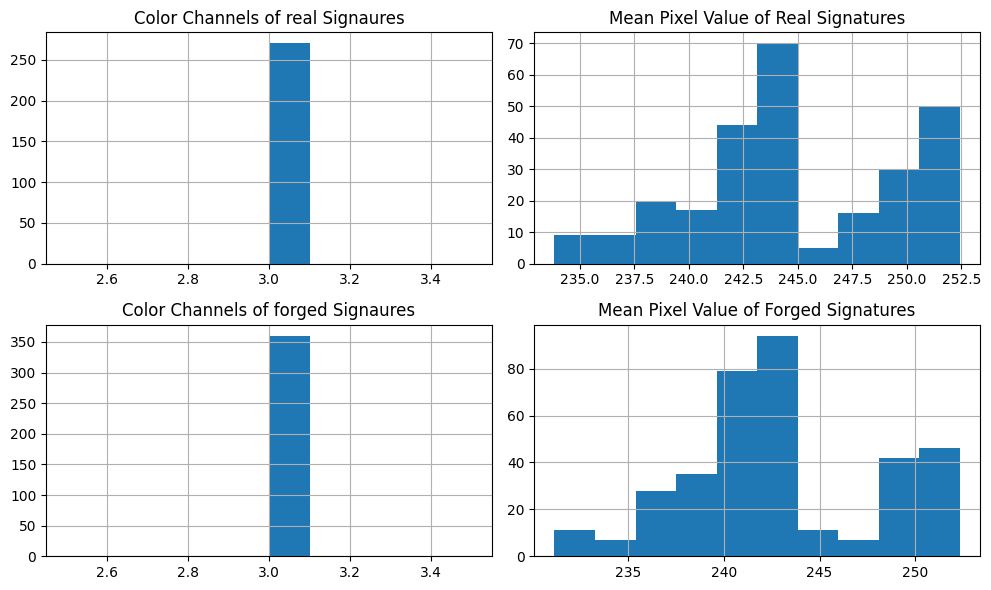

In [18]:
#create histograms to visualize the distribution of image data
fig,ax=plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of real Signaures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of forged Signaures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()




In [19]:
#RNN
import tensorflow
from tensorflow import keras
from keras import layers

In [20]:
#load the data
(train_data,train_labels),(test_data,test_labels)=keras.datasets.mnist.load_data()

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]* 1)) 
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32') / 255

In [23]:
#define the model
model=keras.Sequential([layers.LSTM(64,input_shape=(train_data.shape[1], train_data.shape[2])),layers.Dense(10,activation='softmax')])

C:\Users\BSKarthik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Save the model in HDF5 format
model.save('my_model.h5')


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,458 (95.54 KB)

 Trainable params: 24,458 (95.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#define callbacks
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [28]:
#train the model
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5445 - loss: 1.3651 - val_accuracy: 0.8468 - val_loss: 0.4777
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8901 - loss: 0.3617 - val_accuracy: 0.9327 - val_loss: 0.2293
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9361 - loss: 0.2125 - val_accuracy: 0.9540 - val_loss: 0.1569
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9546 - loss: 0.1536 - val_accuracy: 0.9654 - val_loss: 0.1228
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9639 - loss: 0.1215 - val_accuracy: 0.9617 - val_loss: 0.1230
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9709 - loss: 0.0966 - val_accuracy: 0.9672 - val_loss: 0.1080
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9748 - loss: 0.0834 - val_accuracy: 0.9753 - val_loss: 0.0884
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accu

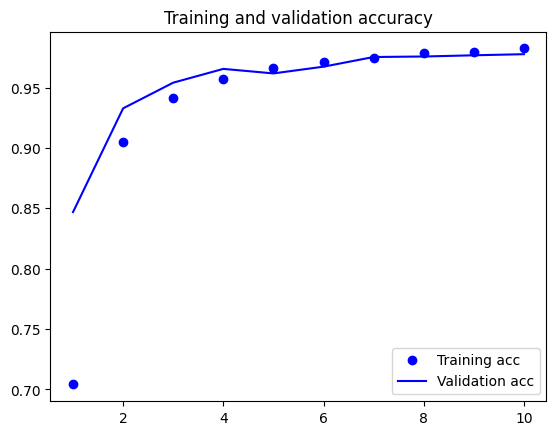

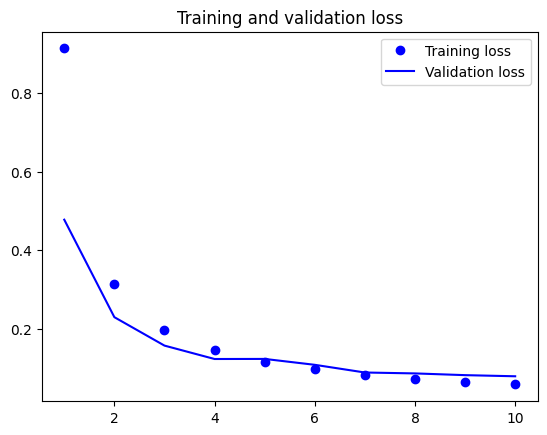

In [29]:
#plot accuracy and loss
acc= history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
#get final loss and accuracy
final_loss,final_accuracy=model.evaluate(test_data,test_labels)

#print results in percentage form
print("final loss: {:.2f}%".format(final_loss*100))
print("final accuracy: {:.2f}%".format(final_accuracy*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0842
final loss: 6.99%
final accuracy: 97.78%


# BI-DIRECTIONAL RNN(B-RNN)


In [31]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional

In [32]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [33]:
# Load genuine signature paths
gen_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*'))

# Load forged signature paths
forg_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*'))




In [34]:
# Split the data into train and test (80% train, 20% test) 
train_ratio= 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) *train_ratio)]
test_gen_sign = gen_sign [int (len(gen_sign) *train_ratio):]

train_forg_sign =forg_sign[:int(len(forg_sign) *train_ratio)]
test_forg_sign = forg_sign [int (len(forg_sign) * train_ratio):]
train_image_paths = train_gen_sign + train_forg_sign 
test_image_paths =test_gen_sign + test_forg_sign

In [35]:
def preprocess_image(image_path,img_size=(128,128),patch_size=(128,128)):
    img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) #read in grayscale
    if img is None:
        raise ValueError(f"failed to load image:{image_path}")
    img=cv2.resize(img,img_size)
    return img_to_patches(img,patch_size)
def img_to_patches(img,patch_size=(256,256)):
    patches=[]
    for i in range(0,img.shape[0],patch_size[0]):
        for j in range(0,img.shape[1],patch_size[1]):
            patch=img[i:i+patch_size[0],j:j+patch_size[1]].flatten()#flatten each path
            patches.append(patch)
    return np.array(patches)

In [36]:
def process_images(image_paths,label):
    X_data=[]
    y_data=[]
    for image_path in image_paths:
        try:
            patches=preprocess_image(image_path)
            X_data.append(patches)
            y_data.append(label)
        except Exception as e:
            print(f"error processing{image_path}: {e}")
    return np.array(X_data),np.array(y_data)


In [37]:
# Create training dataset
X_train_real, y_train_real = process_images (train_gen_sign, label=0) 
X_train_forg, y_train_forg = process_images (train_forg_sign, label=1)

# Create test dataset
# 0 for real
# 1 for forged
X_test_real, y_test_real = process_images (test_gen_sign, label=0) # 0 for real
X_test_forg, y_test_forg =process_images (test_forg_sign, label=1) # 1 for forged

# Combine real and forged data
X_train = np.concatenate([X_train_real, X_train_forg], axis=0) 
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)

X_test =  np.concatenate([X_test_real, X_test_forg], axis=0)
y_test=np.concatenate([y_test_real, y_test_forg], axis=0)
# Shuffle the training data
indices = np.random.permutation (len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

#shuffle test data
test_indices=np.random.permutation(len(X_test))
X_test=X_test[test_indices]
y_test=y_test[test_indices]

In [38]:
print("X_train shape:",X_train.shape)
print("y_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",X_test.shape)

X_train shape: (504, 1, 16384)
y_train shape: (504, 1, 16384)
X_test shape: (126, 1, 16384)
y_test shape: (126, 1, 16384)


In [39]:
timesteps=X_train.shape[1]#number of patches per image
features=X_train.shape[2]#number of features per patch

y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [40]:
model=Sequential([
    Bidirectional(LSTM(64,return_sequences=False),input_shape=(timesteps,features)),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')#2 classes:genuine and forged
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\BSKarthik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │     8,421,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,430,274 (32.16 MB)

 Trainable params: 8,430,274 (32.16 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.save('bi_rnn_signature_verification_model.h5')

In [43]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.5453 - loss: 0.6991 - val_accuracy: 0.5635 - val_loss: 0.6872
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.5432 - loss: 0.6945 - val_accuracy: 0.5714 - val_loss: 0.6874
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.5713 - loss: 0.6823 - val_accuracy: 0.5635 - val_loss: 0.6866
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.5776 - loss: 0.6832 - val_accuracy: 0.5635 - val_loss: 0.6869
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.5610 - loss: 0.6861 - val_accuracy: 0.5635 - val_loss: 0.6870
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.5714 - loss: 0.6838 - val_accuracy: 0.5635 - val_loss: 0.6866
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.5497 - loss: 0.6914 - val_accuracy: 0.5635 - val_loss: 0.6867
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.5949 - loss: 0.6762 - val_accuracy: 0.

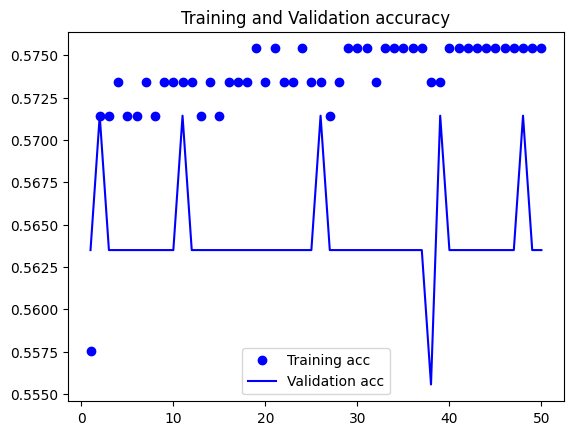

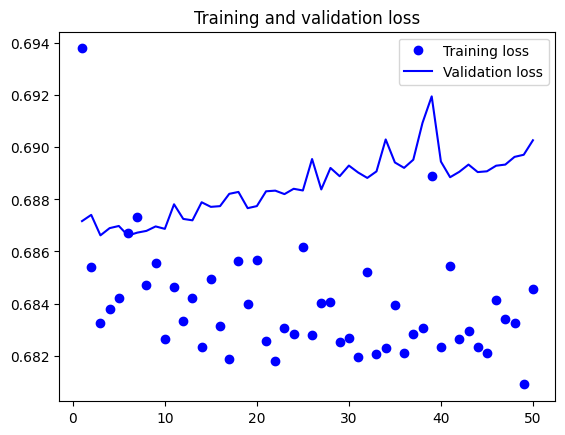

In [44]:
import matplotlib.pyplot as plt
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len (acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc') 
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [45]:
#get the final loss and accuracy
final_loss, final_accuracy= model.evaluate(X_test, y_test)
#print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100)) 
print('Final Accuracy: {:.2f}%'.format(final_accuracy* 100))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5285 - loss: 0.6969
Final loss: 69.03%
Final Accuracy: 56.35%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


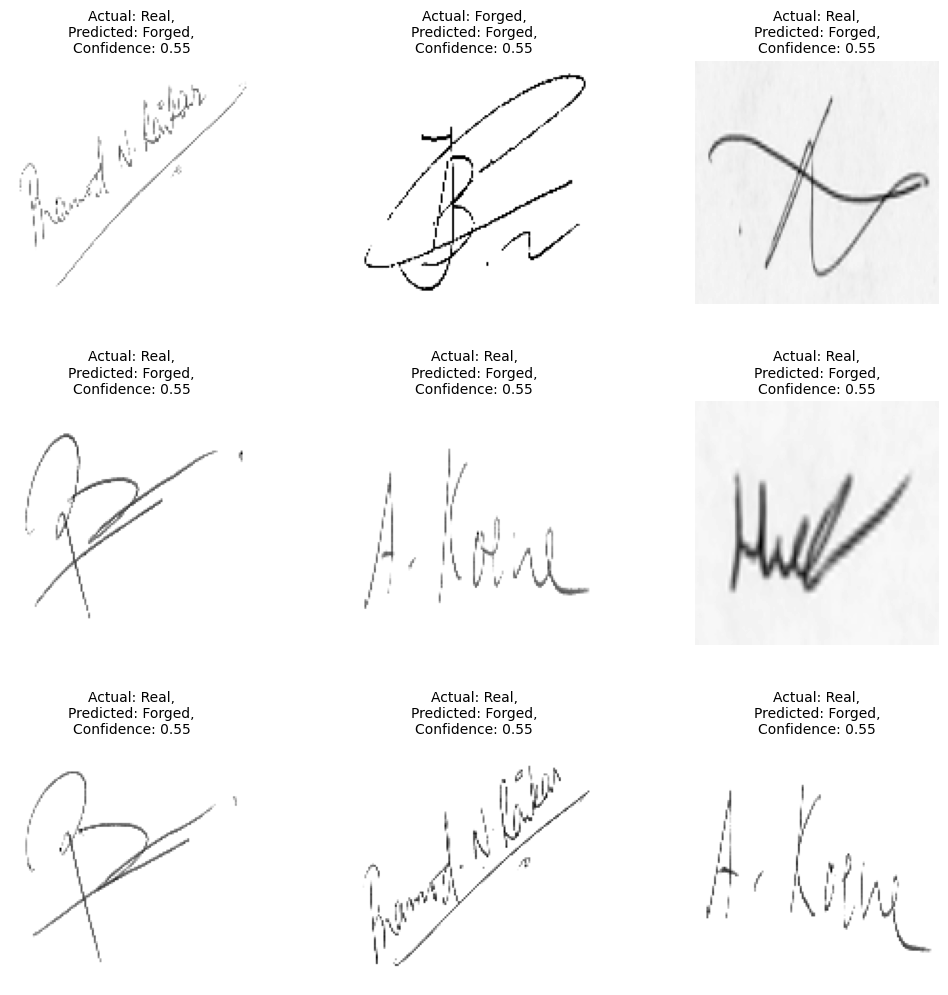

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Create a larger figure to ensure the images are clear
plt.figure(figsize=(12, 12))  # Adjust size to balance clarity and layout

# Loop over the first 9 images
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)  # 3x3 grid
    
    # Reshape the patches back to the correct image shape (128x128)
    image = X_test[i].reshape(128, 128)
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    
    # Predict the class and confidence
    predicted_class = np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))  # Predict the class
    confidence = np.max(model.predict(np.expand_dims(X_test[i], axis=0)))  # Get the confidence score
    
    actual_class = np.argmax(y_test[i])  # Get the actual class
    
    class_names = ['Real', 'Forged']  # Class names
    
    # Set the title with actual, predicted class, and confidence
    plt.title(f'Actual: {class_names[actual_class]},\nPredicted: {class_names[predicted_class]},\nConfidence: {confidence:.2f}',
              fontsize=10)  # Slightly smaller font to fit titles better
    
    # Turn off axis ticks and labels for better visualization
    plt.axis('off')

# Optional: Adjust the space between plots to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()


CRNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
image_size = 256
batch_size = 32
channel = 3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset_Signature_Finals",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
) 

Found 720 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Forge', 'Real']

In [5]:
len(dataset)

23

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


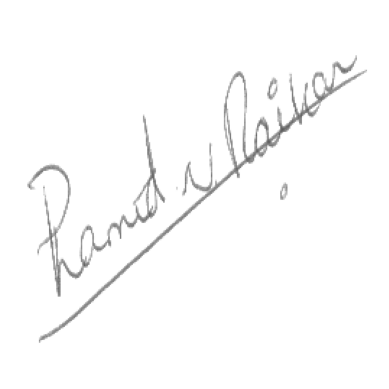

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

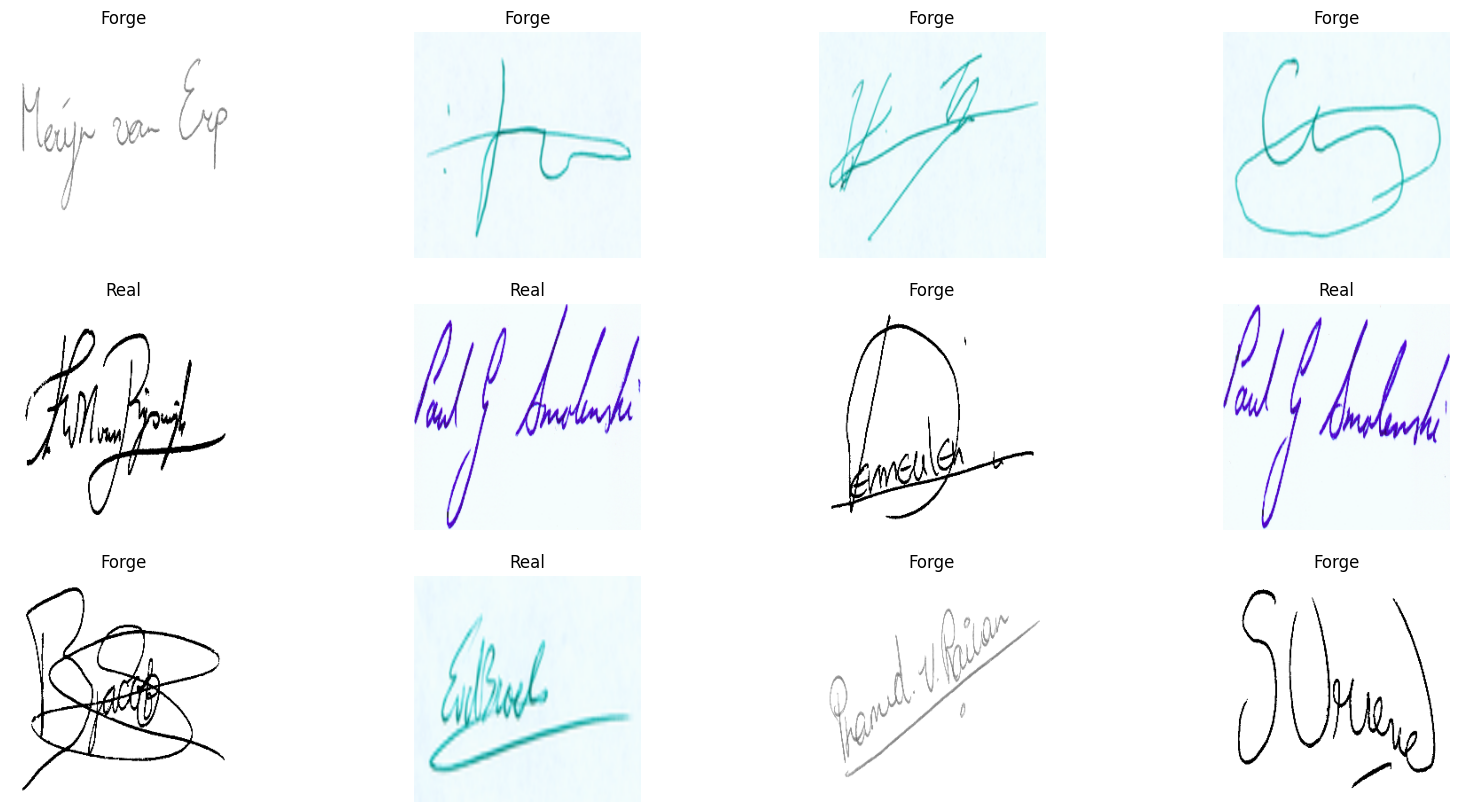

In [13]:
plt.figure(figsize=(20,10)) 
for image_batch, label_batch in dataset.take(1): 
    for i in range(12): 
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [14]:
len(dataset)

23

In [15]:
train_size = 0.8
len(dataset)*train_size

18.400000000000002

In [19]:
def getdataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        return train_ds,val_ds,test_ds

In [20]:
train_ds,val_ds,test_ds=getdataset_partition(dataset)

In [21]:
len(train_ds)

18

In [22]:
len(val_ds)

2

In [23]:
len(test_ds)

3

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1/0.255)
])

In [26]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.1)
])

In [27]:
# Assuming image_size, resize_rescale, and data_augmentation are already defined elsewhere
Channel = 3
image_size = 128  # Example image size, adjust as needed
input_shape = (image_size, image_size, Channel)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Corrected input layer
    resize_rescale,  # Resize and rescale layer
    data_augmentation,  # Data augmentation layer

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Fourth Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Flatten and Fully Connected Layers
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units
    layers.Dense(n_classes, activation='softmax')  # Output layer with softmax for classification
])

C:\Users\BSKarthik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.save('cnn_signature_verification_model.keras')

In [31]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5063 - loss: 199.9922 - val_accuracy: 0.5312 - val_loss: 14.4675
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4872 - loss: 6.1630 - val_accuracy: 0.5312 - val_loss: 1.8596
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4982 - loss: 1.0264 - val_accuracy: 0.4688 - val_loss: 0.6903
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4734 - loss: 0.6933 - val_accuracy: 0.4688 - val_loss: 0.6899
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5113 - loss: 0.6920 - val_accuracy: 0.4531 - val_loss: 0.6868
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5141 - loss: 0.6898 - val_accuracy: 0.4688 - val_loss: 0.6836
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5010 - loss: 0.6806 - val_accuracy: 0.6250 - val_loss: 0.6914
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5169 - loss: 0.6885 - val_accuracy: 0.5469 - val_lo

In [33]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.5141 - loss: 0.6928


In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 18}

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
history.history['accuracy']

[0.5071428418159485,
 0.4982142746448517,
 0.4982142746448517,
 0.4928571283817291,
 0.49464285373687744,
 0.49642857909202576,
 0.5142857432365417,
 0.5196428298950195,
 0.5142857432365417,
 0.512499988079071,
 0.512499988079071,
 0.512499988079071,
 0.5196428298950195,
 0.5321428775787354,
 0.5285714268684387,
 0.5357142686843872,
 0.5410714149475098,
 0.5321428775787354,
 0.5196428298950195,
 0.5107142925262451,
 0.5107142925262451,
 0.5214285850524902,
 0.5107142925262451,
 0.5249999761581421,
 0.5035714507102966,
 0.5053571462631226,
 0.5107142925262451,
 0.5071428418159485,
 0.5249999761581421,
 0.5089285969734192,
 0.5214285850524902,
 0.5196428298950195,
 0.5214285850524902,
 0.5339285731315613,
 0.5392857193946838,
 0.5035714507102966,
 0.5035714507102966,
 0.5071428418159485,
 0.5160714387893677,
 0.5035714507102966,
 0.5071428418159485,
 0.5160714387893677,
 0.5107142925262451,
 0.5196428298950195,
 0.5053571462631226,
 0.5035714507102966,
 0.5035714507102966,
 0.50535714626

In [37]:
acc_his = history.history['accuracy']
val_acc_his = history.history['val_accuracy']

loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

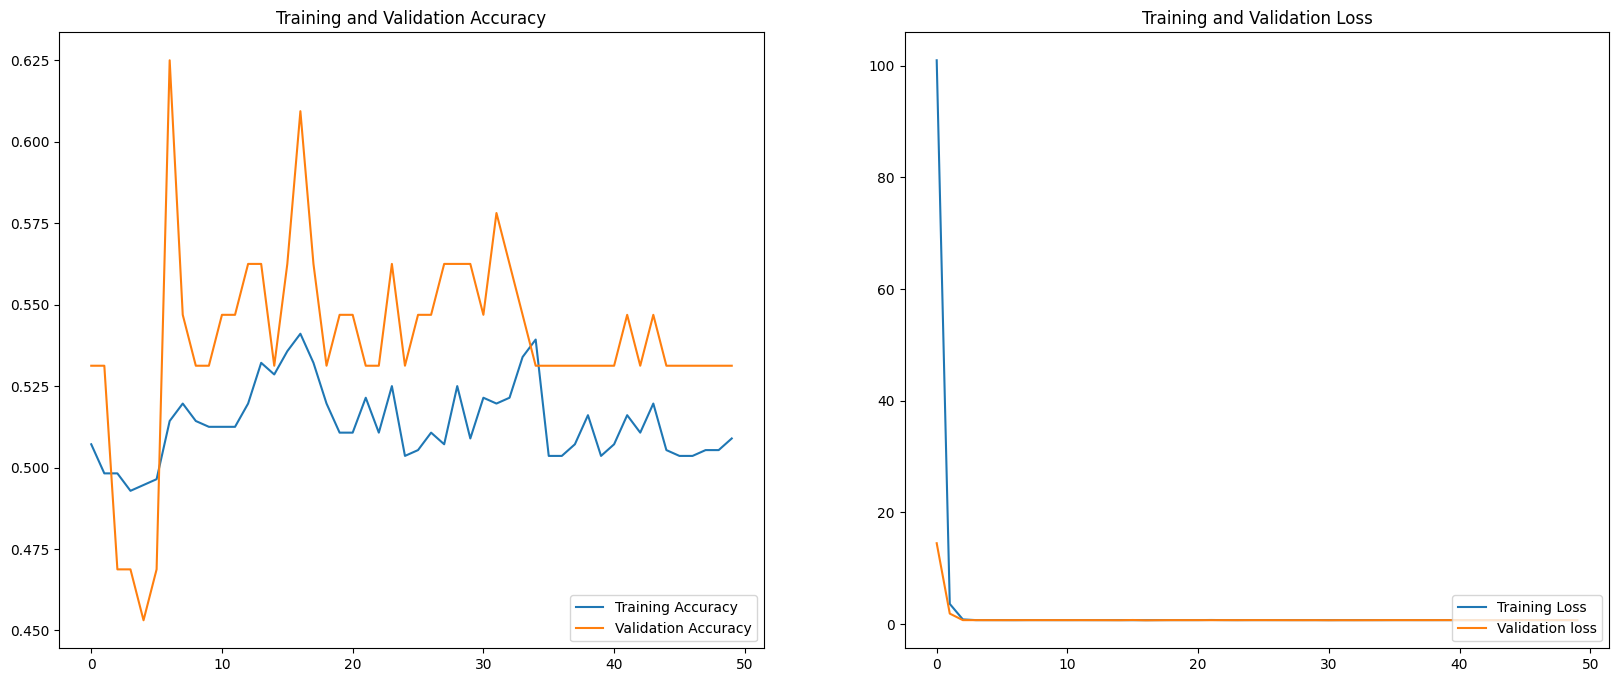

In [38]:
plt.figure(figsize=(20,8))
ax = plt.subplot(1,2,1)
plt.plot(range(50), acc_his, label='Training Accuracy')
plt.plot(range(50), val_acc_his, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

ax = plt.subplot(1,2,2)
plt.plot(range(50), loss_his, label='Training Loss')
plt.plot(range(50), val_loss_his, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Forge
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Forge


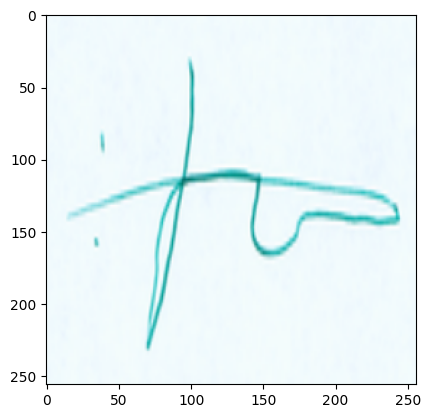

In [39]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8') 
    first_label = label_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    print('Actual Label:', class_names[first_label])

    batch_predictions= model.predict(image_batch) 
    print('predicted label:', class_names[np.argmax(batch_predictions[0])])

In [44]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


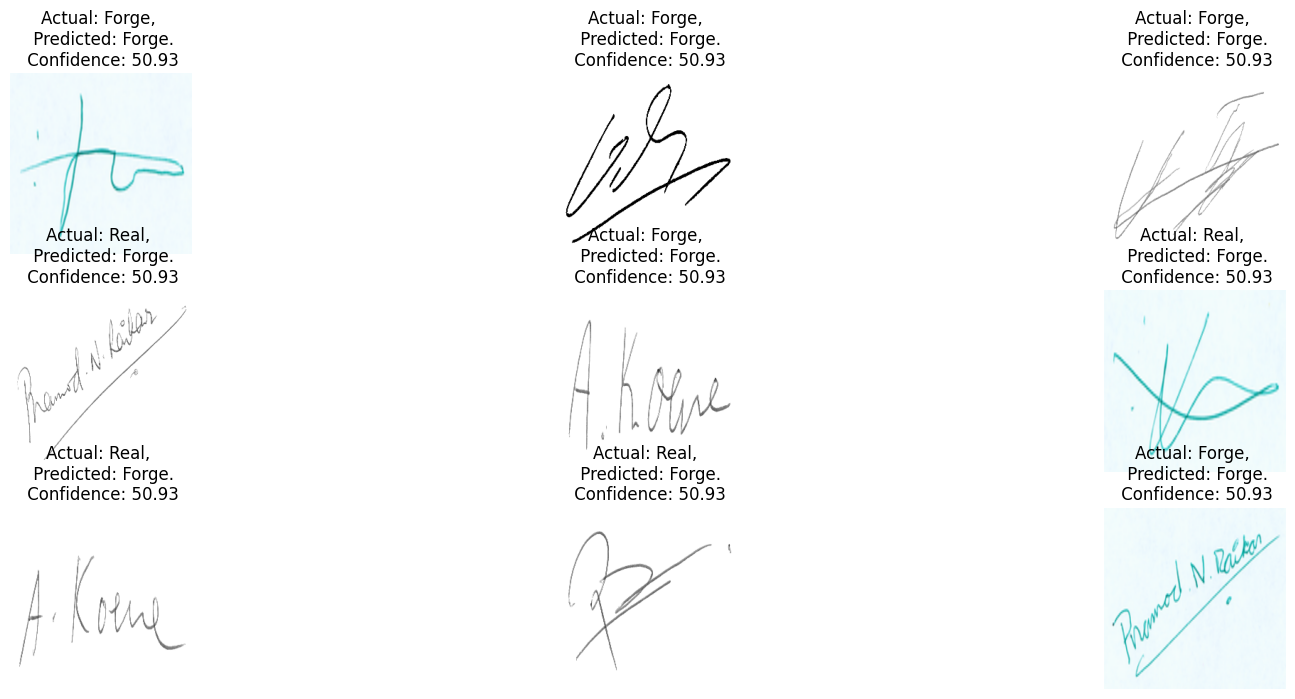

In [45]:
plt.figure(figsize=(20,8))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}')
        plt.axis('off')


    

In [46]:
#get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_ds)

#print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy* 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.5141 - loss: 0.6928
Final loss: 69.29%
Final Accuracy: 51.25%
